# Random Forest

In [ ]:
#Дерево решает задачу классификации
#Для тренировки дерева нам помогают концепции:
#1)Test и train множеств
#2)Валидационного множества
#3)Кроссвалидация
#4)Подбор оптимального параметра
#5)и тд

In [ ]:
#Дерево решений - это сильно переобучаемый алгоритм

In [ ]:
#Специфика дерева такова, что на сложных данных оно переобучается, в этом его слабая сторона
#Но есть способ обернуть эту слабую сторону в сильную
#1)Для того, чтобы это сделать можно взять несколько деревьев и каждому дереву дать разную подвыборку(по переменным и строкам)
#2)Далее каждое дерево будет обучаться на этих данных(с разными наборами параметров(depth, split) с помощью кросс-валидации)
#3)Далее каждое дерево решений предсказывает переменную y исходя из подвыборки
#4)В конце если мы усредним предсказанную вероятность (p1+p2+...pn)/n 
#5)Такая модель машинного обучения называется Random forest

In [ ]:
#Новый параметр модели Random forest - количество деревьев
#Допустим у нас есть 100 деревьев с одинаковыми параметрами, мы меняем параметры всех деревьев
#Например 100 деревьев глубиной 1, потом глубиной 2, потом глубиной 3 и тд.

# RandomForestClassifier

In [3]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [68]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
clf_rf = RandomForestClassifier()

In [ ]:
#Пример использования random forest
#rf = RandomForestClassifier(n_estimators=15, max_depth=5)
#rf.fit(x_train, y_train)
#predictions = rf.predict(x_test)

In [46]:
parametrs = {'n_estimators' :[10, 20, 30],
            'max_depth':[2, 5, 7, 10]}

In [47]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [48]:
titanic_data = pd.read_csv('train.csv')

In [49]:
X = titanic_data.drop(['PassengerId','Survived', 'Name', 'Ticket', 'Cabin'], axis = 1) #axis = 1 - колонки
y = titanic_data.Survived #переменная, которую мы предсказываем
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()}) #заполняем пропущенные значения возраста медианным возрастом
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #генерация трейн и тест множеств

In [51]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,1,0,0,0,1
270,1,28.0,0,0,31.0000,0,1,0,0,1
860,3,41.0,2,0,14.1083,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,0,1


In [52]:
grid_search_cv_clf.fit(X_train, y_train) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [ ]:
#В Data Science очень важен подбор параметров и предобработка данных. Для хорошего решения почти любой нетривиальной проблемы
#нужно понять примерную структуру данных, получить их представление в удобном для использования моделью виде. 
#К первому относится эксплоративный анализ (EDA), а для второго есть feature engineering.
#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15 (эксплоративный анализ)
#иногда наши данные можно вручную разбить на несколько групп, например поворотом осей, в том время, как дереву потребуется
#большая глубина, чтобы это сделать

In [ ]:
#Выведем топ признаков, которые использовал наш Random forest, чтобы классифицировать данные, 
#признаки с наивысшим Information gain

In [53]:
best_clf = grid_search_cv_clf.best_estimator_

In [57]:
best_clf.score(X_test, y_test)

0.8271186440677966

In [59]:
feature_importances = best_clf.feature_importances_ # выражение IG для фичей

In [60]:
feature_importances = pd.DataFrame({'features': list(X_train), 
                                    'feature_importances': feature_importances})

In [65]:
feature_importances.sort_values('feature_importances', ascending=False) #максимальное снижение энтропии Sex_female

,features,feature_importances
5,Sex_female,0.253891
4,Fare,0.189511
6,Sex_male,0.160084
1,Age,0.143969
0,Pclass,0.116038
2,SibSp,0.050065
3,Parch,0.038089
9,Embarked_S,0.017608
7,Embarked_C,0.016771
8,Embarked_Q,0.013974


In [ ]:
#Предсказания, которые дают модели, это уже хорошо, однако не всегда достаточно. 
#С разными усилиями, мы также можем извлечь важность переменных для осуществления предсказания. Это особенно интересно 
#в науке, где мы пытаемся выявить причинно-следственные связи (хотя, от важности переменных до проверки этих связей ещё 
#длинный путь). Из Decision Tree и Random Forest легко вытащить важность переменных для предсказания, но есть одна особенность. 
#При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор
#будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. 
#Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.

In [66]:
heart = pd.read_csv('heart.csv')

In [67]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [76]:
X_train = heart.drop(['target'], axis=1)
y_train = heart.target

In [88]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
rf.feature_importances_

array([0.04344095, 0.0399895 , 0.1399832 , 0.0535693 , 0.05688662,
       0.00849278, 0.01858343, 0.12954976, 0.04807909, 0.11664461,
       0.06920762, 0.07704782, 0.19852531])

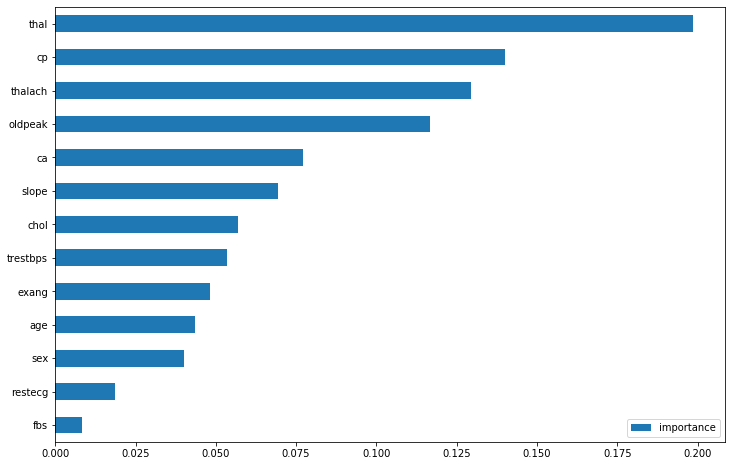

In [90]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
#Random forest менее склонен к переобучению, потому что основан на принципе усреднения, по сути пользуется 
#принципом "мудрости толпы"

# Нейронные сети

In [ ]:
#Слабая сторона Decision tree, Random Forest в том, что они хорошо работают только на высокоуровневых ранговых фичах, 
#но если наши данные представляют например закрашенные или незакрашенные пиксели, тут возникают проблемы
#Чтобы решать задачи связанные с интерпретацией например изображений, используются Нейросети

In [ ]:
#в логистической регрессии y=f(w1*x1 +w2*x2), предположим, что x1 - положительный случай, x2 - отрицательный
#x1, x2, w - это векторы в осях x y, тогда для отрицательной классификации x2 нужно, чтобы скалярное произведение
#вектора x2 и w давало отрицательный результат, а для этого cos угла между ними должен быть отрицательный, то есть угол
#между ними должен быть тупой, в тоже время для положительного случая угол должен быть острый 
#алгоритм двигает вектор так, чтобы все точки на графике классифицировать правильно
#Если взять несколько логистических регрессий, подать в каждую x1,x2, и выходные данные из этих лог.регрессий подать в
#еще одну логистическую регрессию, получится небольшая нейросеть

In [91]:
#Когда мы обучаем нейронные сети, мы подбираем такие веса, чтобы классификация пикселей в фотографии была как можно лучше

In [ ]:
#Визуализация работы нейронной сети:
#https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.39892&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
#Объяснение обучения ANN:
#https://medium.com/datathings/neural-networks-and-backpropagation-explained-in-a-simple-way-f540a3611f5e
#Введение в ANN:
#https://blog.goodaudience.com/artificial-neural-networks-explained-436fcf36e75
#Краткий обзор некоторых видов сетей
#https://medium.com/datadriveninvestor/neural-networks-explained-6e21c70d7818
#Объяснение работы свёрточных нейронных сетей 
#(тех самых, которые используются для разделения картинок с людьми и солнышком от других)
#https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1